# Paper Trading with Python and Binance - the Spot Testnet API

More Information and getting the Credentials: https://testnet.binance.vision/

__Insert your Spot Testnet Credentials here__:

In [1]:
import json

In [2]:
# load the api_key and secret_key from the json file
with open('binance_test_api_keys.json', 'r') as f:
    keys = json.load(f)
    api_key = keys['api_key']
    secret_key = keys['secret_key']

## Creating a Connection to the Spot Testnet

In [3]:
from binance.client import Client

In [4]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) # Testnet!!!

__Simple Rule:__ <br>
Use your __Testnet Credentials with testnet = True__ and your __"Real Account" Credentials with testnet = False__ (default)

In [5]:
client

In [6]:
client.get_account() # Test account details

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754959718927,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.000000

## Spot Testnet API - Overview

__Same Documentation applies for Spot Testnet:__

https://binance-docs.github.io/apidocs/spot/en/#introduction

In [8]:
import pandas as pd
from binance.client import Client

In [9]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) # Testnet!!!

In [10]:
client.get_system_status()

{'status': 0, 'msg': 'normal'}

In [11]:
account = client.get_account()
account

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754959718927,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.000000

In [12]:
df = pd.DataFrame(account["balances"])
df

,asset,free,locked
0,ETH,1.00000000,0.00000000
1,BTC,1.00000000,0.00000000
2,LTC,5.00000000,0.00000000
3,BNB,1.00000000,0.00000000
4,USDT,10000.00000000,0.00000000
...,...,...,...
415,RESOLV,3634.00000000,0.00000000
416,HOME,18446.00000000,0.00000000
417,SPK,14060.00000000,0.00000000
418,NEWT,1486.00000000,0.00000000


In [13]:
df.free = pd.to_numeric(df.free, errors = "coerce")
df.locked = pd.to_numeric(df.locked, errors = "coerce")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   asset   420 non-null    object 
 1   free    420 non-null    float64
 2   locked  420 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.0+ KB


In [15]:
client.get_asset_balance(asset = "BTC")

{'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'}

In [16]:
client.get_asset_balance(asset = "ETH")

{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'}

In [17]:
client.get_asset_balance(asset = "EUR")

{'asset': 'EUR', 'free': '425.00000000', 'locked': '0.00000000'}

In [18]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price for one symbol

{'symbol': 'BTCUSDT', 'price': '118969.36000000'}

In [19]:
# get current prices for all pairs
client.get_all_tickers()

[{'symbol': 'ETHBTC', 'price': '0.03596000'},
 {'symbol': 'LTCBTC', 'price': '0.00101200'},
 {'symbol': 'BNBBTC', 'price': '0.00682800'},
 {'symbol': 'BTCUSDT', 'price': '118969.36000000'},
 {'symbol': 'ETHUSDT', 'price': '4278.55000000'},
 {'symbol': 'TRXBTC', 'price': '0.00000292'},
 {'symbol': 'XRPBTC', 'price': '0.00002650'},
 {'symbol': 'BNBUSDT', 'price': '812.50000000'},
 {'symbol': 'LTCUSDT', 'price': '120.55000000'},
 {'symbol': 'LTCBNB', 'price': '0.14780000'},
 {'symbol': 'XRPUSDT', 'price': '3.15490000'},
 {'symbol': 'XRPBNB', 'price': '0.00387190'},
 {'symbol': 'TRXBNB', 'price': '0.00042870'},
 {'symbol': 'TRXUSDT', 'price': '0.34770000'},
 {'symbol': 'NEOBTC', 'price': '0.00005420'},
 {'symbol': 'QTUMETH', 'price': '0.00051100'},
 {'symbol': 'GASBTC', 'price': '0.00002740'},
 {'symbol': 'BNBETH', 'price': '0.19000000'},
 {'symbol': 'LRCBTC', 'price': '0.00000072'},
 {'symbol': 'LRCETH', 'price': '0.00002000'},
 {'symbol': 'QTUMBTC', 'price': '0.00001756'},
 {'symbol': 'Z

In [20]:
last24 = client.get_ticker(symbol = "BTCUSDT") # 24H Price change statistic
last24

{'symbol': 'BTCUSDT',
 'priceChange': '-69.92000000',
 'priceChangePercent': '-0.059',
 'weightedAvgPrice': '120065.56200816',
 'prevClosePrice': '119039.28000000',
 'lastPrice': '118969.36000000',
 'lastQty': '0.01734000',
 'bidPrice': '118969.35000000',
 'bidQty': '6.10878000',
 'askPrice': '118969.36000000',
 'askQty': '16.86856000',
 'openPrice': '119039.28000000',
 'highPrice': '254615.31000000',
 'lowPrice': '116441.80000000',
 'volume': '1062.49476000',
 'quoteVolume': '127569030.49012130',
 'openTime': 1754875119613,
 'closeTime': 1754961519613,
 'firstId': 3105103,
 'lastId': 3138316,
 'count': 33214}

In [21]:
timestamp = client._get_earliest_valid_timestamp(symbol = "BTCUSDT", interval = "1d")
timestamp

1751414400000

In [22]:
pd.to_datetime(timestamp, unit = "ms") # reset every month!!!

Timestamp('2025-07-02 00:00:00')

In [23]:
def get_history(symbol, interval, start, end = None):
    bars = client.get_historical_klines(symbol = symbol, interval = interval,
                                        start_str = start, end_str = end, limit = 1000)
    df = pd.DataFrame(bars)
    df["Date"] = pd.to_datetime(df.iloc[:,0], unit = "ms")
    df.columns = ["Open Time", "Open", "High", "Low", "Close", "Volume",
                  "Clos Time", "Quote Asset Volume", "Number of Trades",
                  "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore", "Date"]
    df = df[["Date", "Open", "High", "Low", "Close", "Volume"]].copy()
    df.set_index("Date", inplace = True)
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors = "coerce")
    
    return df

In [24]:
df = get_history(symbol = "BTCUSDT", interval = "1d", start = timestamp)
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-02,107418.11,114270.62,30000.00,108801.44,1086.19322
2025-07-03,108809.04,200000.00,25877.33,109591.81,1934.24324
2025-07-04,109592.67,168800.73,28929.72,107984.24,1795.96804
2025-07-05,107984.24,112150.00,30000.00,108198.98,1088.95054
2025-07-06,108198.11,109700.00,30000.00,109203.84,1099.75615
2025-07-07,109203.84,111095.01,22346.68,108300.01,1710.12047
2025-07-08,108300.00,111299.43,22000.00,108907.71,1637.81462
2025-07-09,108907.70,243297.74,30000.00,111277.01,1718.78711
2025-07-10,111282.39,200000.00,30000.00,115983.72,1943.54495


In [25]:
df = get_history(symbol = "BTCUSDT", interval = "1h", start = "2021-09-15")
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-07-02 11:00:00,107418.11,111742.42,94969.33,107479.99,7.37403
2025-07-02 12:00:00,107477.04,108037.38,80653.99,107410.75,78.70217
2025-07-02 13:00:00,107410.74,107940.81,59245.15,107707.49,105.20181
2025-07-02 14:00:00,107709.88,111742.42,89654.00,108108.60,113.99767
2025-07-02 15:00:00,108111.08,108739.75,75377.57,108737.75,109.43139
...,...,...,...,...,...
2025-08-11 21:00:00,118828.83,119172.63,118212.50,118712.61,29.85481
2025-08-11 22:00:00,118712.61,118906.32,118280.71,118886.96,24.76621
2025-08-11 23:00:00,118886.96,118889.00,118601.56,118686.01,59.69067


### ++++++ Update (August 2023) ++++++++

There are two alterantives to stream live data with python-binance:
- using __ThreadedWebsocketManager__ -or-
- using __BinanceSocketManager (newly added to the course)__

__What´s the benefit of covering both options?__<br>
-> We can now __run Trading Bots in Jupyter and as a Script__ with the __latest Versions__ for Python and Python-Binance. No need to care about Versions and Installations anymore!

For more information, please go back to the previous Lectures (API Intro)!

### Option 1: ThreadedWebsocketManager (only executable in scripts, not in Jupyter!):

In [26]:
from binance import ThreadedWebsocketManager

In [28]:
def stream_data(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = msg["c"]
    
    print("Time: {} | Price: {}".format(time, price))

In [ ]:
# initialize and start the WebSocket
twm = ThreadedWebsocketManager()
twm.start()

In [ ]:
# subscribe to the stream
twm.start_symbol_miniticker_socket(callback = stream_data, symbol = "BTCUSDT")

In [ ]:
# stop the Websocket/Stream after 20 seconds
while True:
    time.sleep(20)
    twm.stop()
    break

---------------------------

### Option 2: BinanceSocketManager (executable in Jupyter!):

In [29]:
stream_data

<function __main__.stream_data(msg)>

In [30]:
import asyncio
from binance import AsyncClient, BinanceSocketManager

In [31]:
async def main():
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    ts = bm.symbol_miniticker_socket(symbol = "BTCUSDT")
    
    async with ts as tscm:
        for _ in range(10):
            res = await tscm.recv()
            stream_data(res)

    await client.close_connection()
await main()

Time: 2025-08-12 01:20:09.026000 | Price: 119001.41000000
Time: 2025-08-12 01:20:10.025000 | Price: 119001.42000000
Time: 2025-08-12 01:20:11.025000 | Price: 119001.42000000
Time: 2025-08-12 01:20:12.025000 | Price: 119001.41000000
Time: 2025-08-12 01:20:13.026000 | Price: 119001.41000000
Time: 2025-08-12 01:20:14.026000 | Price: 119001.42000000
Time: 2025-08-12 01:20:15.025000 | Price: 119001.42000000
Time: 2025-08-12 01:20:16.026000 | Price: 119001.41000000
Time: 2025-08-12 01:20:17.025000 | Price: 119001.41000000
Time: 2025-08-12 01:20:18.026000 | Price: 119001.41000000


## Placing a Market Buy Order

In [32]:
from binance.client import Client
import pandas as pd

In [33]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [34]:
client.get_account() 

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754959718927,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.000000

In [36]:
# buy 0.1 BTC
order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.01)

In [37]:
order

{'symbol': 'BTCUSDT',
 'orderId': 13936144,
 'orderListId': -1,
 'clientOrderId': 'x-HNA2TXFJ37d9f8b111bc6f3f74b682',
 'transactTime': 1754961655928,
 'price': '0.00000000',
 'origQty': '0.01000000',
 'executedQty': '0.01000000',
 'origQuoteOrderQty': '0.00000000',
 'cummulativeQuoteQty': '1189.85870000',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'workingTime': 1754961655928,
 'fills': [{'price': '118985.87000000',
   'qty': '0.01000000',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 3138333}],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [38]:
df = pd.DataFrame(order["fills"])
df

,price,qty,commission,commissionAsset,tradeId
0,118985.87000000,0.01000000,0.00000000,BTC,3138333


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            1 non-null      object
 1   qty              1 non-null      object
 2   commission       1 non-null      object
 3   commissionAsset  1 non-null      object
 4   tradeId          1 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 172.0+ bytes


In [40]:
num_columns = ["price", "qty", "commission"]

In [41]:
for column in num_columns:
    df[column] = pd.to_numeric(df[column], errors = "coerce")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1 non-null      float64
 1   qty              1 non-null      float64
 2   commission       1 non-null      float64
 3   commissionAsset  1 non-null      object 
 4   tradeId          1 non-null      int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 172.0+ bytes


In [43]:
df.qty.sum()

np.float64(0.01)

In [44]:
df.price.mul(df.qty).sum()

np.float64(1189.8587)

In [45]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754961655928,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.01000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '8810.14130000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.0000000

In [46]:
# buy BTC for 1,000 USDT 
order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quoteOrderQty = 1000)

In [47]:
order

{'symbol': 'BTCUSDT',
 'orderId': 13936168,
 'orderListId': -1,
 'clientOrderId': 'x-HNA2TXFJ3a27e952fbad01f5829536',
 'transactTime': 1754961679825,
 'price': '0.00000000',
 'origQty': '0.00840000',
 'executedQty': '0.00840000',
 'origQuoteOrderQty': '1000.00000000',
 'cummulativeQuoteQty': '999.43208400',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'workingTime': 1754961679825,
 'fills': [{'price': '118980.01000000',
   'qty': '0.00840000',
   'commission': '0.00000000',
   'commissionAsset': 'BTC',
   'tradeId': 3138336}],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [48]:
avr_price = float(order["cummulativeQuoteQty"]) / float(order["origQty"]) 
avr_price

118980.01000000001

In [49]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754961679825,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.01840000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '7810.70921600', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.0000000

## Placing a Market Sell Order

In [50]:
# selling 0.118011 BTC 
order = client.create_order(symbol = "BTCUSDT", side = "SELL", type = "MARKET", quantity = 0.1)

In [51]:
order

{'symbol': 'BTCUSDT',
 'orderId': 13936192,
 'orderListId': -1,
 'clientOrderId': 'x-HNA2TXFJadcd544015bfae7b610ed8',
 'transactTime': 1754961692103,
 'price': '0.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.10000000',
 'origQuoteOrderQty': '0.00000000',
 'cummulativeQuoteQty': '11896.87300000',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'SELL',
 'workingTime': 1754961692103,
 'fills': [{'price': '118968.73000000',
   'qty': '0.10000000',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 3138340}],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [52]:
client.get_account() # Test account details

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754961692103,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.91840000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '19707.58221600', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.000000

## Placing Limit Orders

In [53]:
from binance.client import Client
import pandas as pd

In [54]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [55]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754961692103,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.91840000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '19707.58221600', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.000000

In [56]:
client.get_symbol_ticker(symbol = "BTCUSDT") # current price

{'symbol': 'BTCUSDT', 'price': '118950.20000000'}

__Limit Buy Order__

In [57]:
order1 = client.create_order(symbol="BTCUSDT", side = "BUY", type = "LIMIT",
                            quantity = 0.1, timeInForce = "GTC", price = 50000)

In [58]:
order1

{'symbol': 'BTCUSDT',
 'orderId': 13936218,
 'orderListId': -1,
 'clientOrderId': 'x-HNA2TXFJ597b66aa376c9aea1a76ae',
 'transactTime': 1754961708610,
 'price': '50000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'origQuoteOrderQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'workingTime': 1754961708610,
 'fills': [],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [59]:
order_id_buy = order1["orderId"]
order_id_buy

13936218

In [60]:
client.get_order(symbol = "BTCUSDT", orderId = order_id_buy)

{'symbol': 'BTCUSDT',
 'orderId': 13936218,
 'orderListId': -1,
 'clientOrderId': 'x-HNA2TXFJ597b66aa376c9aea1a76ae',
 'price': '50000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'NEW',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'stopPrice': '0.00000000',
 'icebergQty': '0.00000000',
 'time': 1754961708610,
 'updateTime': 1754961708610,
 'isWorking': True,
 'workingTime': 1754961708610,
 'origQuoteOrderQty': '0.00000000',
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

__Limit Sell Order__

In [61]:
order2 = client.create_order(symbol="BTCUSDT", side = "SELL", type = "LIMIT",
                            quantity = 0.1, timeInForce = "GTC", price = 60000)

In [62]:
order2

{'symbol': 'BTCUSDT',
 'orderId': 13936219,
 'orderListId': -1,
 'clientOrderId': 'x-HNA2TXFJ64fb7f5e5c7fd51fd7b052',
 'transactTime': 1754961710084,
 'price': '60000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.10000000',
 'origQuoteOrderQty': '0.00000000',
 'cummulativeQuoteQty': '11895.02000000',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'SELL',
 'workingTime': 1754961710084,
 'fills': [{'price': '118950.20000000',
   'qty': '0.10000000',
   'commission': '0.00000000',
   'commissionAsset': 'USDT',
   'tradeId': 3138346}],
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [63]:
order_id_sell = order2["orderId"]
order_id_sell

13936219

In [64]:
open_orders = client.get_open_orders(symbol = "BTCUSDT")
open_orders

[{'symbol': 'BTCUSDT',
  'orderId': 13936218,
  'orderListId': -1,
  'clientOrderId': 'x-HNA2TXFJ597b66aa376c9aea1a76ae',
  'price': '50000.00000000',
  'origQty': '0.10000000',
  'executedQty': '0.00000000',
  'cummulativeQuoteQty': '0.00000000',
  'status': 'NEW',
  'timeInForce': 'GTC',
  'type': 'LIMIT',
  'side': 'BUY',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1754961708610,
  'updateTime': 1754961708610,
  'isWorking': True,
  'workingTime': 1754961708610,
  'origQuoteOrderQty': '0.00000000',
  'selfTradePreventionMode': 'EXPIRE_MAKER'}]

In [65]:
pd.DataFrame(open_orders)

,symbol,orderId,orderListId,clientOrderId,price,origQty,executedQty,cummulativeQuoteQty,status,timeInForce,type,side,stopPrice,icebergQty,time,updateTime,isWorking,workingTime,origQuoteOrderQty,selfTradePreventionMode
0,BTCUSDT,13936218,-1,x-HNA2TXFJ597b66aa376c9aea1a76ae,50000.00000000,0.10000000,0.00000000,0.00000000,NEW,GTC,LIMIT,BUY,0.00000000,0.00000000,1754961708610,1754961708610,True,1754961708610,0.00000000,EXPIRE_MAKER


In [66]:
result = client.cancel_order(symbol = "BTCUSDT", orderId = order_id_buy)
result

{'symbol': 'BTCUSDT',
 'origClientOrderId': 'x-HNA2TXFJ597b66aa376c9aea1a76ae',
 'orderId': 13936218,
 'orderListId': -1,
 'clientOrderId': '6Givws2KGeaIdeaHsCtV92',
 'transactTime': 1754961711169,
 'price': '50000.00000000',
 'origQty': '0.10000000',
 'executedQty': '0.00000000',
 'origQuoteOrderQty': '0.00000000',
 'cummulativeQuoteQty': '0.00000000',
 'status': 'CANCELED',
 'timeInForce': 'GTC',
 'type': 'LIMIT',
 'side': 'BUY',
 'selfTradePreventionMode': 'EXPIRE_MAKER'}

In [67]:
result = client.cancel_order(symbol = "BTCUSDT", orderId = order_id_sell)
result

BinanceAPIException: APIError(code=-2011): Unknown order sent.

## Reporting: Getting all (historical) Orders and Trades

In [ ]:
from binance.client import Client
import pandas as pd

In [ ]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True) 

In [ ]:
all_orders = client.get_all_orders(symbol = "BTCUSDT")
all_orders

In [ ]:
pd.DataFrame(all_orders)

In [68]:
trades = client.get_my_trades(symbol = "BTCUSDT")
trades

[{'symbol': 'BTCUSDT',
  'id': 3138333,
  'orderId': 13936144,
  'orderListId': -1,
  'price': '118985.87000000',
  'qty': '0.01000000',
  'quoteQty': '1189.85870000',
  'commission': '0.00000000',
  'commissionAsset': 'BTC',
  'time': 1754961655928,
  'isBuyer': True,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 3138336,
  'orderId': 13936168,
  'orderListId': -1,
  'price': '118980.01000000',
  'qty': '0.00840000',
  'quoteQty': '999.43208400',
  'commission': '0.00000000',
  'commissionAsset': 'BTC',
  'time': 1754961679825,
  'isBuyer': True,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 3138340,
  'orderId': 13936192,
  'orderListId': -1,
  'price': '118968.73000000',
  'qty': '0.10000000',
  'quoteQty': '11896.87300000',
  'commission': '0.00000000',
  'commissionAsset': 'USDT',
  'time': 1754961692103,
  'isBuyer': False,
  'isMaker': False,
  'isBestMatch': True},
 {'symbol': 'BTCUSDT',
  'id': 3138346,
  'orderId': 139

In [69]:
df = pd.DataFrame(trades)
df

,symbol,id,orderId,orderListId,price,qty,quoteQty,commission,commissionAsset,time,isBuyer,isMaker,isBestMatch
0,BTCUSDT,3138333,13936144,-1,118985.87000000,0.01000000,1189.85870000,0.00000000,BTC,1754961655928,True,False,True
1,BTCUSDT,3138336,13936168,-1,118980.01000000,0.00840000,999.43208400,0.00000000,BTC,1754961679825,True,False,True
2,BTCUSDT,3138340,13936192,-1,118968.73000000,0.10000000,11896.87300000,0.00000000,USDT,1754961692103,False,False,True
3,BTCUSDT,3138346,13936219,-1,118950.20000000,0.10000000,11895.02000000,0.00000000,USDT,1754961710084,False,False,True


In [70]:
df.time = pd.to_datetime(df.time, unit = "ms", errors = "coerce")

In [71]:
df

,symbol,id,orderId,orderListId,price,qty,quoteQty,commission,commissionAsset,time,isBuyer,isMaker,isBestMatch
0,BTCUSDT,3138333,13936144,-1,118985.87000000,0.01000000,1189.85870000,0.00000000,BTC,2025-08-12 01:20:55.928,True,False,True
1,BTCUSDT,3138336,13936168,-1,118980.01000000,0.00840000,999.43208400,0.00000000,BTC,2025-08-12 01:21:19.825,True,False,True
2,BTCUSDT,3138340,13936192,-1,118968.73000000,0.10000000,11896.87300000,0.00000000,USDT,2025-08-12 01:21:32.103,False,False,True
3,BTCUSDT,3138346,13936219,-1,118950.20000000,0.10000000,11895.02000000,0.00000000,USDT,2025-08-12 01:21:50.084,False,False,True


## Creating & Running a first (simple) Trading Bot

In [72]:
from binance.client import Client
import pandas as pd

In [73]:
client = Client(api_key = api_key, api_secret = secret_key, tld = "com", testnet = True)

In [74]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754961711169,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.81840000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '31602.60221600', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.000000

### Random Trading Bot

__A simple random Trading Bot__: Stream Market Data and buy 0.1 BTC (with USDT) once condition x (Price and/or Volume) has been met. Then stop the Stream.

Condition x: Price (rounded down) is divisible by 10 without remainder.

In [75]:
40215 % 10 # modulo

5

__Using the Miniticker Stream:__

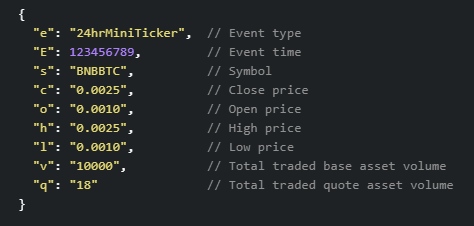

### Option 1: ThreadedWebsocketManager (only executable in scripts, not in Jupyter!):

In [76]:
from binance import ThreadedWebsocketManager

In [ ]:
twm = ThreadedWebsocketManager()
twm.start()

In [77]:
def simple_bot(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = float(msg["c"])
    
    print("Time: {} | Price: {}".format(time, price))
    
    if int(price) % 10 == 0:
        order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)
        print("\n" + 50 * "-")
        print("Buy {} BTC for {} USDT".format(order["executedQty"], order["cummulativeQuoteQty"]))
        print(50 * "-" + "\n")
        
        twm.stop() # stop defined inside callback

In [78]:
twm.start_symbol_miniticker_socket(callback = simple_bot, symbol = "BTCUSDT")
twm.join() # required if stop is defined in callback function

NameError: name 'twm' is not defined

-----------------------------

### Option 2: BinanceSocketManager (executable in Jupyter!): 

In [79]:
import asyncio
from binance import AsyncClient, BinanceSocketManager

In [80]:
stop_streaming = False # setting a stop_streaming variable (initially: False)

In [81]:
def simple_bot(msg):
    ''' define how to process incoming WebSocket messages '''
    
    time = pd.to_datetime(msg["E"], unit = "ms")
    price = float(msg["c"])
    
    print("Time: {} | Price: {}".format(time, price))
    
    if int(price) % 10 == 0:
        order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.1)
        print("\n" + 50 * "-")
        print("Buy {} BTC for {} USDT".format(order["executedQty"], order["cummulativeQuoteQty"]))
        print(50 * "-" + "\n")
        
        global stop_streaming
        stop_streaming = True  # stop defined inside callback

In [82]:
async def main():
    client = await AsyncClient.create()
    bm = BinanceSocketManager(client)
    ts = bm.symbol_miniticker_socket(symbol="BTCUSDT")
    
    async with ts as tscm:
        while True:
            res = await tscm.recv()
            simple_bot(res)
            
            if stop_streaming:
                break

    await client.close_connection()

In [83]:
await main()

Time: 2025-08-12 01:22:36.026000 | Price: 118899.33
Time: 2025-08-12 01:22:37.026000 | Price: 118913.03
Time: 2025-08-12 01:22:38.026000 | Price: 118913.03
Time: 2025-08-12 01:22:39.014000 | Price: 118913.04
Time: 2025-08-12 01:22:40.025000 | Price: 118913.03
Time: 2025-08-12 01:22:41.025000 | Price: 118913.04
Time: 2025-08-12 01:22:42.025000 | Price: 118913.04
Time: 2025-08-12 01:22:43.026000 | Price: 118913.04
Time: 2025-08-12 01:22:44.025000 | Price: 118913.03
Time: 2025-08-12 01:22:45.014000 | Price: 118913.04
Time: 2025-08-12 01:22:46.025000 | Price: 118913.04
Time: 2025-08-12 01:22:47.026000 | Price: 118913.04
Time: 2025-08-12 01:22:48.025000 | Price: 118913.04
Time: 2025-08-12 01:22:49.014000 | Price: 118913.04
Time: 2025-08-12 01:22:50.026000 | Price: 118913.04
Time: 2025-08-12 01:22:51.025000 | Price: 118913.04
Time: 2025-08-12 01:22:52.026000 | Price: 118913.04
Time: 2025-08-12 01:22:53.026000 | Price: 118913.04
Time: 2025-08-12 01:22:54.025000 | Price: 118913.04
Time: 2025-0

In [84]:
client.get_account() 

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1754961806463,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '0.91840000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '5.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '19712.33021600', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '1778.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '228.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '92.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '260.000000